# Rotational Velocity of Galaxy vs Mass of Dark Matter Halos
## At a radius where the density is 200x the critical density of the universe

Code originally written by Jaymin Ding, 2023

In [66]:
# Imports
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import os
import re
from plotly.offline import init_notebook_mode
import scipy
from IPython.display import display, HTML
import io

In [45]:
data = []
for filename in os.listdir("Data/Fits/ByGalaxy/Table"):
    fin = open("Data/Fits/ByGalaxy/Table/" + filename)
    s = fin.read().split("\n")
    for i in range(len(s)):
        s[i] = filename[:-4] + s[i]
    s = s[34:]
    data.append(s)
print(data)

[['UGC07603     pISO-Flat  0.48  0.12  0.00  0.00   4.68  1.33  78.0   3.0   71.29   3.27  112.65   70.60    0.87    0.54  -0.90   0.87  11.06  0.06  0.00  0.00   0.47', 'UGC07603  Burkert-Flat  0.48  0.11  0.00  0.00   4.69  1.32  78.0   3.0   36.83   3.59   33.45   12.67    1.51    0.59  -0.87   0.53  10.20  0.13  0.00  0.00   0.28', 'UGC07603      NFW-Flat  0.47  0.12  0.00  0.00   5.01  1.34  78.0   3.0   67.78  56.78    8.88    5.03   10.46   10.58  -2.30   1.72  11.00  1.09  0.00  0.00   2.14', 'UGC07603      NFW-LCDM  0.46  0.10  0.00  0.00   5.54  0.94  78.6   3.0   56.78   3.51   10.02    2.13    7.76    1.72  -2.18   0.30  10.77  0.08  0.00  0.00   2.36', 'UGC07603  Einasto-Flat  0.51  0.12  0.00  0.00   4.61  1.37  78.3   3.1   23.37   4.70   15.30    5.14    2.09    0.82  -1.69   0.58   9.61  0.26  1.11  0.36   2.36', 'UGC07603  Einasto-LCDM  0.48  0.11  0.00  0.00   4.26  1.05  77.4   3.0   51.37   4.47   12.01    3.06    5.86    1.58  -2.48   0.37  10.64  0.11  0.28  0.04

In [46]:
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j] = re.sub("\s+", ",", data[i][j].strip())
data

[['UGC07603,pISO-Flat,0.48,0.12,0.00,0.00,4.68,1.33,78.0,3.0,71.29,3.27,112.65,70.60,0.87,0.54,-0.90,0.87,11.06,0.06,0.00,0.00,0.47',
  'UGC07603,Burkert-Flat,0.48,0.11,0.00,0.00,4.69,1.32,78.0,3.0,36.83,3.59,33.45,12.67,1.51,0.59,-0.87,0.53,10.20,0.13,0.00,0.00,0.28',
  'UGC07603,NFW-Flat,0.47,0.12,0.00,0.00,5.01,1.34,78.0,3.0,67.78,56.78,8.88,5.03,10.46,10.58,-2.30,1.72,11.00,1.09,0.00,0.00,2.14',
  'UGC07603,NFW-LCDM,0.46,0.10,0.00,0.00,5.54,0.94,78.6,3.0,56.78,3.51,10.02,2.13,7.76,1.72,-2.18,0.30,10.77,0.08,0.00,0.00,2.36',
  'UGC07603,Einasto-Flat,0.51,0.12,0.00,0.00,4.61,1.37,78.3,3.1,23.37,4.70,15.30,5.14,2.09,0.82,-1.69,0.58,9.61,0.26,1.11,0.36,2.36',
  'UGC07603,Einasto-LCDM,0.48,0.11,0.00,0.00,4.26,1.05,77.4,3.0,51.37,4.47,12.01,3.06,5.86,1.58,-2.48,0.37,10.64,0.11,0.28,0.04,2.36',
  'UGC07603,DC14-Flat,0.46,0.11,0.00,0.00,3.98,1.17,77.8,3.0,41.56,3.22,47.46,23.44,1.20,0.60,-1.02,0.50,10.36,0.10,0.00,0.00,0.28',
  'UGC07603,DC14-LCDM,0.59,0.11,0.00,0.00,7.89,0.91,78.5,3.0,59.

In [47]:
for i in range(len(data)):
    data[i] = data[i][:-1]
data

[['UGC07603,pISO-Flat,0.48,0.12,0.00,0.00,4.68,1.33,78.0,3.0,71.29,3.27,112.65,70.60,0.87,0.54,-0.90,0.87,11.06,0.06,0.00,0.00,0.47',
  'UGC07603,Burkert-Flat,0.48,0.11,0.00,0.00,4.69,1.32,78.0,3.0,36.83,3.59,33.45,12.67,1.51,0.59,-0.87,0.53,10.20,0.13,0.00,0.00,0.28',
  'UGC07603,NFW-Flat,0.47,0.12,0.00,0.00,5.01,1.34,78.0,3.0,67.78,56.78,8.88,5.03,10.46,10.58,-2.30,1.72,11.00,1.09,0.00,0.00,2.14',
  'UGC07603,NFW-LCDM,0.46,0.10,0.00,0.00,5.54,0.94,78.6,3.0,56.78,3.51,10.02,2.13,7.76,1.72,-2.18,0.30,10.77,0.08,0.00,0.00,2.36',
  'UGC07603,Einasto-Flat,0.51,0.12,0.00,0.00,4.61,1.37,78.3,3.1,23.37,4.70,15.30,5.14,2.09,0.82,-1.69,0.58,9.61,0.26,1.11,0.36,2.36',
  'UGC07603,Einasto-LCDM,0.48,0.11,0.00,0.00,4.26,1.05,77.4,3.0,51.37,4.47,12.01,3.06,5.86,1.58,-2.48,0.37,10.64,0.11,0.28,0.04,2.36',
  'UGC07603,DC14-Flat,0.46,0.11,0.00,0.00,3.98,1.17,77.8,3.0,41.56,3.22,47.46,23.44,1.20,0.60,-1.02,0.50,10.36,0.10,0.00,0.00,0.28',
  'UGC07603,DC14-LCDM,0.59,0.11,0.00,0.00,7.89,0.91,78.5,3.0,59.

In [48]:
fout = open("Data/Fits/ByGalaxy/CSV/out.csv", "w")
fout.write("Galaxy,Model,Ydisk,e_Ydisk,Ybul,e_Ybul,D,e_D,inc,e_inc,V200,e_V200,C200,e_C200,rs,e_rs,log(rhos),e_log(rhos),log(M200),e_log(M200),alpha,e_alpha,Chi\n")
for lines in data:
    for line in lines:
        fout.write(line + "\n")
fout.close()

In [49]:
df = pd.read_csv("Data/Fits/ByGalaxy/CSV/out.csv")
df

,Galaxy,Model,Ydisk,e_Ydisk,Ybul,e_Ybul,D,e_D,inc,e_inc,...,e_C200,rs,e_rs,log(rhos),e_log(rhos),log(M200),e_log(M200),alpha,e_alpha,Chi
0,UGC07603,pISO-Flat,0.48,0.12,0.0,0.0,4.68,1.33,78.0,3.0,...,70.60,0.87,0.54,-0.90,0.87,11.06,0.06,0.00,0.00,0.47
1,UGC07603,Burkert-Flat,0.48,0.11,0.0,0.0,4.69,1.32,78.0,3.0,...,12.67,1.51,0.59,-0.87,0.53,10.20,0.13,0.00,0.00,0.28
2,UGC07603,NFW-Flat,0.47,0.12,0.0,0.0,5.01,1.34,78.0,3.0,...,5.03,10.46,10.58,-2.30,1.72,11.00,1.09,0.00,0.00,2.14
3,UGC07603,NFW-LCDM,0.46,0.10,0.0,0.0,5.54,0.94,78.6,3.0,...,2.13,7.76,1.72,-2.18,0.30,10.77,0.08,0.00,0.00,2.36
4,UGC07603,Einasto-Flat,0.51,0.12,0.0,0.0,4.61,1.37,78.3,3.1,...,5.14,2.09,0.82,-1.69,0.58,9.61,0.26,1.11,0.36,2.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NGC3109,DC14-LCDM,0.67,0.14,0.0,0.0,1.39,0.07,75.2,4.1,...,1.16,3.98,0.28,-1.98,0.08,10.74,0.05,0.00,0.00,0.31
2096,NGC3109,coreNFW-Flat,0.44,0.10,0.0,0.0,1.09,0.07,47.1,6.0,...,1.38,8.87,1.66,-2.01,0.31,11.15,0.19,0.00,0.00,1.89
2097,NGC3109,coreNFW-LCDM,0.54,0.11,0.0,0.0,1.06,0.07,65.0,4.8,...,1.09,5.40,0.52,-1.89,0.14,10.64,0.06,0.00,0.00,3.54
2098,NGC3109,Lucky13-Flat,0.50,0.12,0.0,0.0,1.33,0.07,69.6,5.0,...,1.08,7.16,0.72,-1.60,0.16,11.21,0.09,0.00,0.00,0.26


In [50]:
df['V200']

0       71.29
1       36.83
2       67.78
3       56.78
4       23.37
        ...  
2095    55.84
2096    76.09
2097    51.41
2098    80.00
2099    63.63
Name: V200, Length: 2100, dtype: float64

In [51]:
df['log(rhos)']
df['log(rhos)'].head()

0   -0.90
1   -0.87
2   -2.30
3   -2.18
4   -1.69
Name: log(rhos), dtype: float64

In [52]:
init_notebook_mode(connected=True)
fig = px.scatter(df, y='log(M200)', x='V200')
fig.show()

In [53]:
# according to Dr. Mitra:
# try to fit an equation to it
# see whether other galaxies from other sources have a similar trend
# see how many curves you can get and what the nature is

In [54]:
fit = np.polyfit(np.log(df['V200']), df['log(M200)'], 1)

print(fit)

[1.30287577 5.5031842 ]


The fit calculated using numpy is $m = 1.30287577\ln\omega + 5.5031842$, where $m$ is in $M_\odot$ and $\omega$ is in $\text{km/s}$.

In [55]:
max(df['log(M200)'])

13.6

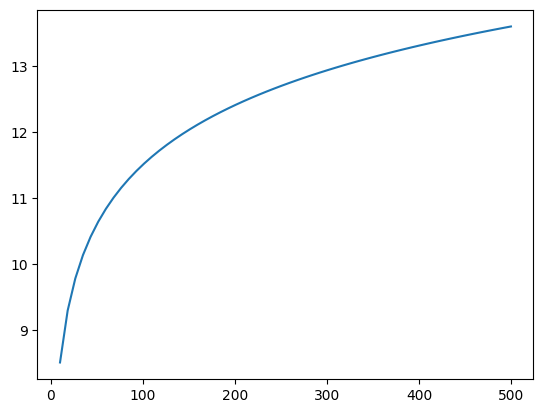

In [56]:
import matplotlib.pyplot as plt

x = np.linspace(10.01, 499.8, 60)
y = 1.30287577 * np.log(x) + 5.5031842

plt.plot(x, y)
plt.show()

In [57]:
fit2 = scipy.optimize.curve_fit(lambda t, a, b: b + a * np.log(t), df['V200'], df['log(M200)'])
fit2

(array([1.30287577, 5.5031842 ]),
 array([[ 8.21798714e-09, -3.67818244e-08],
        [-3.67818244e-08,  1.68688276e-07]]))

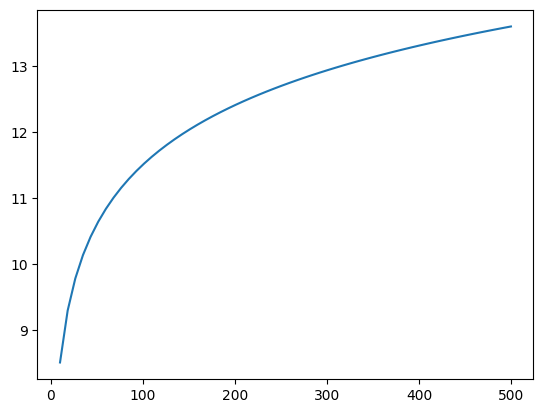

In [58]:
x = np.linspace(10.01, 499.8, 60)
y = 1.30287577 * np.log(x) + 5.5031842

plt.plot(x, y)
plt.show()

In [59]:
min(df['V200']), max(df['V200'])

(10.01, 499.8)

In [69]:

display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))
df2 = pd.DataFrame()
m = lambda omega: 1.30287577 * np.log(omega) + 5.5031842
df2['x'] = np.linspace(10.01, 499.8, 60)
df2['y'] = m(df2['x'])
df['Color'] = ["blue"] * len(df['V200'])
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df['V200'], y=df['log(M200)'], mode="markers", marker=dict(color=df["Color"]), showlegend=False))
fig2.add_trace(go.Scatter(x=df2['x'], y=df2['y'], mode="markers", marker=dict(color=["Red"] * len(df2['x'])), showlegend=False))
fig2.add_trace(go.Scatter(x=[None], y=[None], mode="markers", marker=dict(color=df["Color"]), showlegend=True, name=r"$\text{SPARC Data}$"),)
fig2.add_trace(go.Scatter(x=[None], y=[None], mode="markers", marker=dict(color=["Red"]), showlegend=True, name=r'$\text{Calculated Equation: }m = 1.303 \ln v_{rot} + 5.503$'))
fig2.update_layout(xaxis_title=r"$\text{Rotational Velocity (km/s)}$", yaxis_title=r"$\text{Dark Matter Halo Mass }(M_\odot)$", legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig2.write_html(io.StringIO(), include_mathjax='cdn')
fig2.show()